# **MNIST DATASET**



# Baixa o dataset MNIST (70.000 imagens de 28x28 pixels)

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X = mnist["data"] # imagens (cada imagem é um vetor de 784 números: 28x28 pixels)
y = mnist["target"].astype(int) # o numero que a imagem representa (0 a 9)

# Criação dos vetores alvo (5 e 7)

In [ ]:
y_5 = (y == 5)  # True para 5, False para outros
y_7 = (y == 7)  # True para 7, False para outros

# Dividir em treino (80%) e teste (20%)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y5_train, y5_test, y7_train, y7_test = train_test_split(
    X, y, y_5, y_7, test_size=0.2, random_state=42
)

# Função auxiliar para treinar e avaliar

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train) # Treina o modelo
    pred = model.predict(X_test) # Faz previsoes pro conjunto de teste
    cm = confusion_matrix(y_test, pred) # Matriz de Confusao
    acc = precision_score(y_test, pred) # Precisao vp/(vp+fp)
    rcc = recall_score(y_test, pred) # Revocacao vp/(vp+fn)
    return cm, acc, rcc

**verdadeiros negativos**: xx análises foram corretamente classificadas como não 5.

**falsos positivos**: xx foram erroneamente classificadas como 5.

**falso negativos:** xx foram classificadas erroneamente como não 5.

**verdadeiros positivos**: xx foram corretamente classificadas como 5.

**"Um classificador perfeito teria somente verdadeiros negativos e verdadeiros positivos."**

# Gradiente Descendente

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_5 = SGDClassifier(random_state=42) # Cria o modelo
sgd_5_cm, sgd_5_acc, sgd_5_rcc = train_and_evaluate(sgd_5, X_train, y5_train, X_test, y5_test)

md(f"""
## SGD - 5

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | {sgd_5_cm[0][0]} | {sgd_5_cm[1][1]} |
| FALSO | {sgd_5_cm[1][0]} | {sgd_5_cm[0][1]} |

### Precisão: {sgd_5_acc*100:.2f}%
### Revocação: {sgd_5_rcc*100:.2f}%
""")


## SGD - 5

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | 12620 | 939 |
| FALSO | 334 | 107 |

### Precisão: 89.77%  
### Revocação: 73.76%


In [ ]:
sgd_7 = SGDClassifier(random_state=42)
sgd_7_cm, sgd_7_acc, sgd_7_rcc = train_and_evaluate(sgd_7, X_train, y7_train, X_test, y7_test)

md(f"""
## SGD - 7

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | {sgd_7_cm[0][0]} | {sgd_7_cm[1][1]} |
| FALSO | {sgd_7_cm[1][0]} | {sgd_7_cm[0][1]} |

### Precisão: {sgd_7_acc*100:.2f}%
### Revocação: {sgd_7_rcc*100:.2f}%
""")


## SGD - 7

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | 12438 | 1185 |
| FALSO | 318 | 59 |

### Precisão: 95.26%  
### Revocação: 78.84%


# Naive Bayes Gaussiano

O Naive Bayes é um modelo probabilístico, ou seja, ele vai tentar calcular a chance de uma imagem ser o número 5 ou o número 7, com base nos valores dos pixels.

Ele é chamado de “naive” (“ingênuo”) porque supõe que todos os pixels são independentes entre si. O que, na prática, não é verdade, já que os pixels de uma imagem estão relacionados (formam linhas e curvas).

**Mesmo assim, essa suposição torna o modelo:**
- Muito rápido de treinar e testar;
- Muito leve computacionalmente;
- E bom como linha de base (baseline), ou seja, um ponto de partida para comparar com outros modelos.

## Como ele funciona:
Quando você mostra várias imagens de números 5 e 7, o Naive Bayes para cada pixel, ele calcula a probabilidade de estar escuro (ou claro) em imagens de 5 e de 7. Depois, quando chega uma nova imagem, ele combina essas probabilidades para decidir se a imagem tem pixels mais parecidos com o padrão dos 5 ou dos 7.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_5 = GaussianNB()
gnb_5_cm, gnb_5_acc, gnb_5_rcc = train_and_evaluate(gnb_5, X_train, y5_train, X_test, y5_test)

md(f"""
## GNB - 5

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | {gnb_5_cm[0][0]} | {gnb_5_cm[1][1]} |
| FALSO | {gnb_5_cm[1][0]} | {gnb_5_cm[0][1]} |

### Precisão: {gnb_5_acc*100:.2f}%
### Revocação: {gnb_5_rcc*100:.2f}%
""")


## GNB - 5

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | 2261 | 1258 |
| FALSO | 15 | 10466 |

### Precisão: 10.73%
### Revocação: 98.82%


In [ ]:
gnb_7 = GaussianNB()
gnb_7_cm, gnb_7_acc, gnb_7_rcc = train_and_evaluate(gnb_7, X_train, y7_train, X_test, y7_test)

md(f"""
## GNB - 7

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | {gnb_7_cm[0][0]} | {gnb_7_cm[1][1]} |
| FALSO | {gnb_7_cm[1][0]} | {gnb_7_cm[0][1]} |

### Precisão: {gnb_7_acc*100:.2f}%
### Revocação: {gnb_7_rcc*100:.2f}%
""")


## GNB - 7

### Matriz de Confusão
|| NEGATIVO | POSITIVO |
|:--:|:--:|:--:|
| VERDADEIRO | 8418 | 1487 |
| FALSO | 16 | 4079 |

### Precisão: 26.72%
### Revocação: 98.94%


## Exemplo de teste

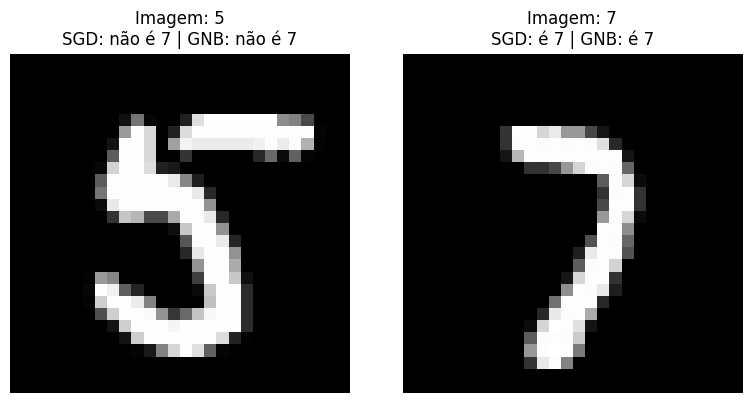

In [ ]:
import numpy as np

# pega uma imagem real de um 5
idx_5 = np.where(y_test == 5)[0][0]
img_5 = X_test[idx_5]
true_label_5 = y_test[idx_5]

# pega uma imagem real de um 7
idx_7 = np.where(y_test == 7)[0][0]
img_7 = X_test[idx_7]
true_label_7 = y_test[idx_7]

# previsões para "é 5?"
sgd_pred_5 = sgd_7.predict([img_5])[0]
gnb_pred_5 = gnb_7.predict([img_5])[0]

sgd_pred_7 = sgd_7.predict([img_7])[0]
gnb_pred_7 = gnb_7.predict([img_7])[0]

import matplotlib.pyplot as plt

# Exibe as imagens lado a lado
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Imagem do 5
axes[0].imshow(img_5.reshape(28, 28), cmap="gray"7
axes[0].axis("off")
axes[0].set_title(
    f"Imagem: 5\nSGD: {'é 7' if sgd_pred_5 else 'não é 7'} | GNB: {'é 7' if gnb_pred_5 else 'não é 7'}"
)

# Imagem do 7
axes[1].imshow(img_7.reshape(28, 28), cmap="gray")
axes[1].axis("off")
axes[1].set_title(
    f"Imagem: 7\nSGD: {'é 7' if sgd_pred_7 else 'não é 7'} | GNB: {'é 7' if gnb_pred_7 else 'não é 7'}"
)

plt.tight_layout()
plt.show()

## Por que o desempenho é menor

**Ele teve revocação muito alta (99%), mas precisão baixa (10%), ou seja:**
- Ele acerta quase todos os 5 e 7 reais (ótima revocação);
- Mas ao mesmo tempo erra muito, marcando 5 e 7 em muitas imagens que não são 5 e 7 (baixa precisão).

**Isso acontece porque:**
- O modelo não entende a relação entre os pixels;
- E o MNIST é um conjunto de dados visual, onde o formato e o contexto dos traços importam.

### Comparando os dois modelos
- O Naive Bayes baseia-se em probabilidades
- O Gradiente Descendente busca ajustar pesos para minimizar erros.

| Critério | **Gradiente Descendente (SGD)** | **Naive Bayes** |
| :----------------- | :---------------------------------- | :-------------------------------------- |
| Tipo de modelo | Linear (baseado em pesos e erros) | Probabilístico (baseado em frequências) |
| Tempo de treino | Médio | Muito rápido |
| Interpretação | Aprende padrões mais complexos | Simples, mas limitado |
| Precisão esperada  | Alta | Baixa |
| Revocação esperada | Boa | Alta (mas com falsos positivos) |
| Ideal para | Dados contínuos, imagens, regressão | Texto, e-mails, spam, categóricos |
| No MNIST (5 vs 7) | Melhor desempenho | Serve como base de comparação |

# **PLANILHA LOGÍSTICA DE SERVIÇO PREDIAL**

# Leitura e visualização da base de dados

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/dadosLog.xlsx'

df = pd.read_excel(path)
df.head()

,"""cod_chamado""",des_assunto,des_chamado,des_status,dat_criacao,dat_modificacao,cod_marca,cod_grupo,cod_formulario,cod_usuario_atribuido_para,...,des_email_usuario_solicitante,num_telefone,nom_cliente,nom_usuario_solicitante,des_responsavel,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136
0,1484,Vazamento no telhado - G3 M3 - Dux,Boa tarde Giovane\n\nSegue mapeamento do vazam...,closed,2022-10-20 18:32:24,2022-11-19 02:28:36,1900000000000,4.420000e+12,4420000000000,6.330000e+12,...,usuario65701.408333370418@dominio96267.2482669...,(95.108205013313892) 98478.20033456661-4983.84...,Cliente 2254,Usuário -8464,Usuário Responsavel -8452,NaN,NaN,NaN,NaN,NaN
1,3184,Estrutura metálica corretivas,Estrutura metálica corretivas,open,2023-05-24 13:58:00,2023-05-24 18:09:03,1900000000000,1.030000e+13,4420000000000,6.330000e+12,...,usuario23404.333507616091@dominio34622.0483223...,(73.373838866370889) 95232.7901306617941-7609....,Cliente -469,Usuário -6534,Usuário Responsavel -8452,NaN,NaN,NaN,NaN,NaN
2,1204,Instalações Elétricas - Luminárias,Instalações Elétricas,closed,2022-09-28 09:30:42,2023-02-18 02:28:45,1900000000000,1.030000e+13,4420000000000,6.330000e+12,...,usuario44347.172796145111@dominio32591.4484315...,(91.115314128940057) 93221.8252747482557-6630....,Cliente -5798,Usuário -6758,Usuário Responsavel -5348,NaN,NaN,NaN,NaN,NaN
3,1796,Erosão do talude na APP e Canaletas danificadas,"Erosão do talude na APP danifica canaletas, co...",solved,2022-12-06 17:52:01,2023-05-10 11:32:40,1900000000000,1.030000e+13,4420000000000,6.330000e+12,...,usuario58393.165471388231@dominio57799.2045157...,(58.269645841907511) 99557.6804992660964-1188....,Cliente 2825,NaN,Usuário Responsavel -5348,NaN,NaN,NaN,NaN,NaN
4,3660,Pendências escada Hidraulica ( antiga área de ...,Pendências escada Hidraulica ( antiga área de ...,open,2023-07-17 11:11:57,2023-07-17 11:11:57,1900000000000,1.030000e+13,4420000000000,1.900000e+12,...,usuario17679.932243358075@dominio62130.6029487...,(72.453240772150792) 97321.9144190307925-8364....,Cliente 2825,NaN,Usuário Responsavel -9367,NaN,NaN,NaN,NaN,NaN


# Pré-processamento

In [ ]:
# Remoção de colunas sem nome
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remoção das aspas extras no nome da coluna cod_chamado
df = df.rename(columns={df.columns[0]: 'cod_chamado'})

# Remoção dos chamados duplicados (mantendo a modificação mais recente), deletados
df = df.sort_values('dat_modificacao', ascending=False)
df = df.drop_duplicates(subset='cod_chamado', keep='first').reset_index(drop= True)

df = df.drop(df[df['des_status'] == 'deleted'].index)

# Preencher chamados com status "solved" e dat_resolucao vazia com a data da última modificação
cond1 = (df['des_status'].str.lower() == 'solved') & (df['dat_resolucao'].isna())
df.loc[cond1, 'dat_resolucao'] = df.loc[cond1, 'dat_modificacao']

# Preencher chamados com status "closed" e dat_conslusao vazia com a data de resolução
cond2 = (df['des_status'].str.lower() == 'closed') & (df['dat_conclusao'].isna())
df.loc[cond2, 'dat_conclusao'] = df.loc[cond1, 'dat_resolucao']

# Visualização da base de dados tratada
print('colunas do DataFrame:', df.columns.tolist())
df.head()

colunas do DataFrame: ['cod_chamado', 'des_assunto', 'des_chamado', 'des_status', 'dat_criacao', 'dat_modificacao', 'cod_marca', 'cod_grupo', 'cod_formulario', 'cod_usuario_atribuido_para', 'cod_usuario_solicitante', 'cod_usuario_remetente', 'cod_organizacao', 'des_prioridade', '_dat_carga', 'dat_resolucao', 'dat_conclusao', 'cod_uf', 'des_origem_ticket', 'dat_evento', 'des_hora_evento', 'vlr_nota_avaliacao_cliente_atendimento', 'des_empresa', 'des_categoria', 'des_armazem', 'des_condominio', 'des_comentario', 'des_local', 'des_servico', 'des_tipo_servico', 'des_veiculo_modelo', 'des_veiculo_placa', 'des_veiculo_cor', 'cod_mensagem_ativa', 'nom_mensagem_ativa', 'des_tipo_mensagem_ativa', 'des_prioridade_chamado', 'des_cliente_reponsavel_atualizacao', 'des_cliente_solicitante', 'des_nome_completo_leads', 'des_cargo_leads', 'des_segmento_leads', 'des_como_ficou_conhecendo_log', 'des_regiao_leads', 'des_empreendimento_leads', 'des_tamanho_galpao_leads', 'dat_inicio_operacao_leads', 'des_o

,cod_chamado,des_assunto,des_chamado,des_status,dat_criacao,dat_modificacao,cod_marca,cod_grupo,cod_formulario,cod_usuario_atribuido_para,...,nom_empresa_acidente,des_incidente_status_cco,des_tipo_cco,des_status_etapa,des_atendimento,des_email_usuario_solicitante,num_telefone,nom_cliente,nom_usuario_solicitante,des_responsavel
0,31300,Estruturas do teto cederam em alguns pontos de...,Estruturas do teto cederam em alguns pontos de...,open,2025-03-13 09:52:34,2025-04-29 16:14:47,1900000000000,1.700000e+13,4420000000000,NaN,...,NaN,NaN,NaN,EM MOBILIZAÇÃO,OPERAÇÕES,usuario34562.774180004868@dominio58953.6840471...,(20.500494375580885) 92048.2317840985129-4700....,Cliente -9054,Usuário 9625,Usuário Responsavel -1672
1,34513,BURACOS NO PISO EM FRENTE A DOCA,Foi identificado buracos em frente a doca 76,open,2025-04-10 15:10:01,2025-04-29 16:13:52,1900000000000,1.940000e+13,4420000000000,NaN,...,NaN,NaN,NaN,EM VISTORIA,OPERAÇÕES,usuario41938.817894009568@dominio90401.2765407...,(41.078656835948394) 96269.9879084988843-3731....,Cliente 4058,Usuário -6760,Usuário Responsavel -7285
2,28878,Termo_de_Entrega_de_Chaves_TecPet_G1_M13_LOG_C...,"Prezados, boa tarde!\n\n \n\nSegue em anexo o ...",new,2025-02-10 17:44:20,2025-04-29 16:10:44,1900000000000,NaN,4420000000000,NaN,...,NaN,NaN,NaN,NaN,NaN,usuario32510.541929375748@dominio88564.2307384...,(69.699036174460332) 95417.0596427672044-8791....,NaN,NaN,NaN
3,30819,Instalação de luminárias,Necessário instalação de luminárias em área co...,open,2025-03-07 10:04:16,2025-04-29 16:07:55,1900000000000,1.030000e+13,4420000000000,6.330000e+12,...,NaN,NaN,NaN,EM CONTRATAÇÃO,MANUTENÇÕES,usuario74859.618210786633@dominio69288.6702793...,(82.604374356493963) 99809.1001187572074-2601....,Cliente -3776,Usuário -9324,Usuário Responsavel -5348
4,30656,PISO CEDENDO EM FRENTE AS DOCAS,"Prezados,\n\nNotar que em quase todas as docas...",open,2025-03-05 13:31:25,2025-04-29 16:04:19,1900000000000,1.700000e+13,4420000000000,NaN,...,NaN,NaN,NaN,EM VISTORIA,MANUTENÇÕES,usuario50258.571294680463@dominio57921.2466602...,(53.38667016040619) 96614.1184047838551-8525.7...,Cliente 4838,Usuário -674,Usuário Responsavel -1672


A planilha se trata de um dataset de chamados (tickets) de um sistema de atendimento/gestão operacional, ligado a manutenção predial, operações logísticas, facilities... É uma lista de chamados abertos por clientes/usuarios para reportar problemas, solicitar serviços ou registrar incidentes em um ambiente operacional.

### Ela contém:
- Informações do chamado
- Status e datas
- Identificadores internos (IDs de marca, grupo, formulário, usuários…)
- Informações sobre cliente e solicitante
- Informações complementares de atendimento e incidentes

### Principais colunas que serão utilizadas:
- des_chamado: descrição do tipo de pedido de manutenção
- des_prioridade: grau de urgência do chamado (low, normal, high, urgent)

# Aplicação do modelo

Para o exemplo, vamos supor que a tarefa seja prever o grau de urgência do chamado a partir do tipo de pedido de manutenção.

## Preparação

In [ ]:
# Selecionar apenas linhas que possuem tipo de pedido de manutenção
df_predial = df[df['des_prioridade'].notna()].copy()

X = df_predial['des_chamado']
y = df_predial['des_prioridade']

# Vetorização com TF-IDF
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_pt = stopwords.words("portuguese")

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords_pt, max_features=5000)

X_vec = vectorizer.fit_transform(X)

# Split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

df_predial[['des_chamado', 'des_prioridade']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,des_chamado,des_prioridade
0,Estruturas do teto cederam em alguns pontos de...,normal
1,Foi identificado buracos em frente a doca 76,normal
2,"Prezados, boa tarde!\n\n \n\nSegue em anexo o ...",normal
3,Necessário instalação de luminárias em área co...,normal
4,"Prezados,\n\nNotar que em quase todas as docas...",normal


## Naive Bayes Multinominal

Nesse caso vamos utilizar o Naive Bayes Multinominal que também se baseia em probabilidade, é simples e rápido, porém é mais adequado para lidar com dados textuais. Diferente do Naive Bayes Gaussiano, que é indicado para dados numéricos contínuos.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # Cria o modelo
nb.fit(X_train, y_train) # Treina o modelo
acc_nb = nb.score(X_test, y_test) # Calcula a porcentagem de acerto

md(f"""
### Acurácia: {acc_nb*100:.2f}%
""")


### Acurácia: 92.75%


## Exemplo de teste

In [ ]:
tipo = [
    "Revitalização pintura da sala de descanso da equipe. Material e mão de obra conforme orçamento."
]

vec = vectorizer.transform(tipo)

md(f"""
  ### Previsão: {nb.predict(vec)[0]}
""")


  ### Previsão: normal


# Conclusão

O modelo Naive Bayes Multinomial apresentou uma acurácia de 93%, demonstrando excelente capacidade de prever o grau de urgência dos chamados com base na descrição do tipo de pedido de manutenção.
Durante o teste prático, o modelo classificou o pedido “Revitalização pintura da sala de descanso da equipe. Material e mão de obra conforme orçamento.” como de prioridade normal, o que condiz com o contexto, já que se trata de um serviço estético, sem caráter emergencial.

Esses resultados indicam que o modelo é capaz de aprender e generalizar bem os padrões de urgência a partir das palavras presentes nas descrições dos chamados. Assim, ele pode ser utilizado como uma ferramenta de apoio à decisão, auxiliando na validação automática de pedidos urgentes e na priorização de atendimentos de forma mais eficiente e confiável.